#Introduction to TensorFlow

TensorFlow adalah library yang dikembangkan oleh google dan merupakan salah satu library yang paling populer serta banyak digunakan untuk mengembangkan dan menerapkan Machine Learning dan algoritma lain yang memiliki banyak operasi matematika untuk dilakukan.

Google meluncurkan TensorFlow untuk memperkenalkan ekosistem yang menyediakan kumpulan alur kerja untuk mengembangkan dan melatih model, untuk mengimplementasikan Machine Learning di hampir semua aplikasi.

Untuk menginstall TensorFlow kita dapat menggunakan pip
```console
pip install tensorflow
```

Jika memiliki GPU berkemampuan CUDA, kita dapat menginstal versi GPU TensorFlow.
```console
pip install tensorflow-gpu
```

In [ ]:
import tensorflow as tf  #Import TensorFlow
print(tf.__version__)  #cek versi

2.8.0


#Deep Learning dengan TensorFlow

##Regresi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


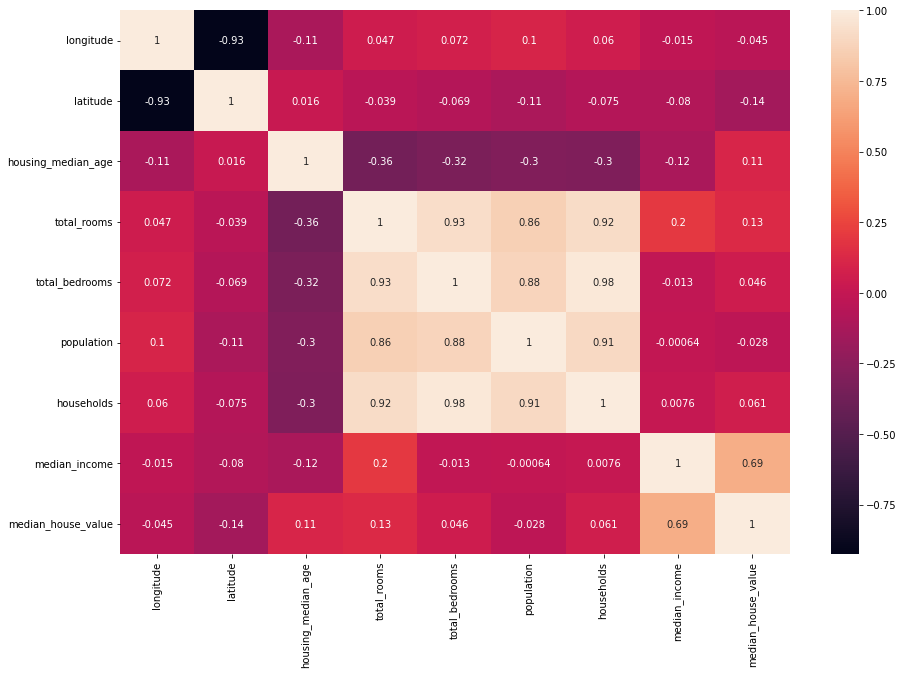

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Memisahkan antara feature dan label
X = df.drop('median_house_value',axis=1)
y = df[['median_house_value']]

print(X.shape)
print(y.shape)

(17000, 8)
(17000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13600, 8) (13600, 1)
(3400, 8) (3400, 1)


In [ ]:
X.shape[1]

8

In [ ]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(X.shape[1], activation='relu')) #Input Layer
model.add(Dense(200, activation='relu')) #hidden 1
model.add(Dense(200, activation='relu')) #hidden 2
model.add(Dense(1)) #output

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100)

Epoch 1/100
340/340 [==============================] - 2s 3ms/step - loss: 139114.3125 - val_loss: 106612.7891
Epoch 2/100
340/340 [==============================] - 1s 2ms/step - loss: 89084.7266 - val_loss: 83434.6328
Epoch 3/100
340/340 [==============================] - 1s 2ms/step - loss: 82131.4219 - val_loss: 81555.9141
Epoch 4/100
340/340 [==============================] - 1s 2ms/step - loss: 80884.1016 - val_loss: 79780.0781
Epoch 5/100
340/340 [==============================] - 1s 2ms/step - loss: 78763.3984 - val_loss: 78274.8438
Epoch 6/100
340/340 [==============================] - 1s 2ms/step - loss: 76618.3828 - val_loss: 75735.7344
Epoch 7/100
340/340 [==============================] - 1s 2ms/step - loss: 74357.8672 - val_loss: 73494.9609
Epoch 8/100
340/340 [==============================] - 1s 2ms/step - loss: 72571.0469 - val_loss: 71491.0625
Epoch 9/100
340/340 [==============================] - 1s 2ms/step - loss: 70829.3906 - val_loss: 69944.2500
Epoch 10/100
340/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 8)                   72        
                                                                 
 dense_1 (Dense)             (32, 200)                 1800      
                                                                 
 dense_2 (Dense)             (32, 200)                 40200     
                                                                 
 dense_3 (Dense)             (32, 1)                   201       
                                                                 
Total params: 42,273
Trainable params: 42,273
Non-trainable params: 0
_________________________________________________________________


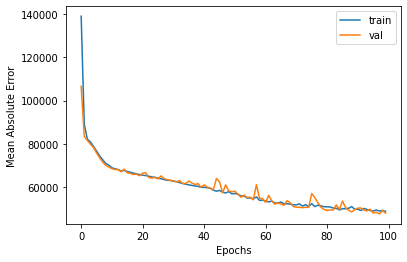

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
#melakukan prediksi
y_pred = model.predict(X_test)

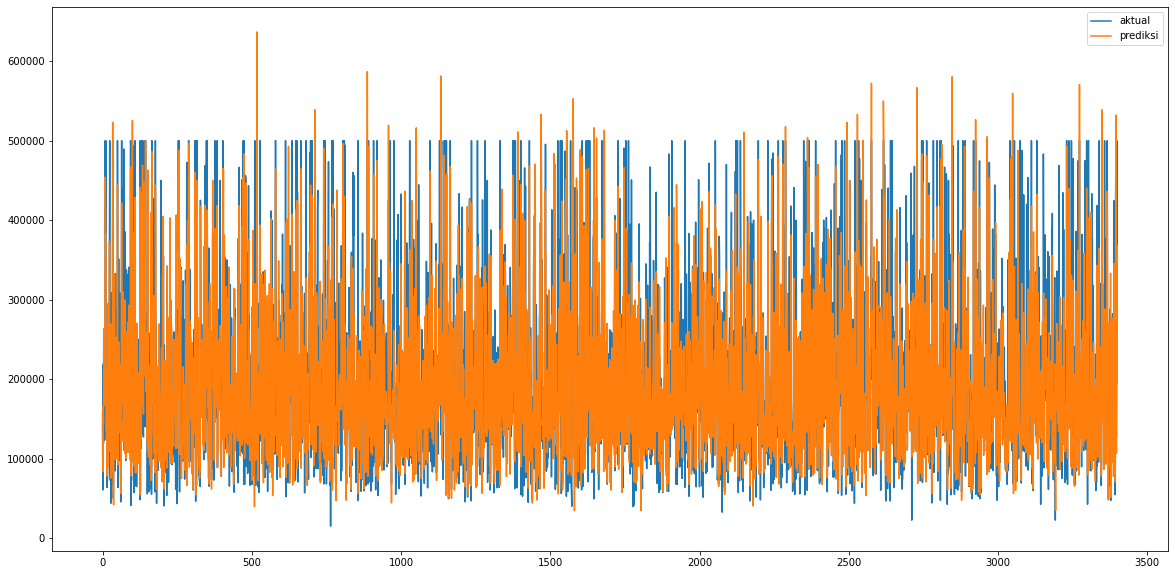

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='aktual')
plt.plot(y_pred, label='prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, y_pred)
rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
mae = mean_absolute_error(y_test.values, y_pred)
mape = mean_absolute_percentage_error(y_test.values, y_pred)
nilai_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error             = {:.2f}'.format(mse))
print('Nilai Root Mean Squared Error        = {:.2f}'.format(rmse))
print('Nilai Mean Absolute Error            = {:.2f}'.format(mae))
print('Nilai Mean Absolute Percentage Error = {:.2f}'.format(mape))
print('Nilai R2                             = {:.2f}'.format(nilai_r))

Nilai Mean Squared Error             = 4709792318.11
Nilai Root Mean Squared Error        = 68627.93
Nilai Mean Absolute Error            = 48327.98
Nilai Mean Absolute Percentage Error = 0.26
Nilai R2                             = 0.65


##Klasifikasi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


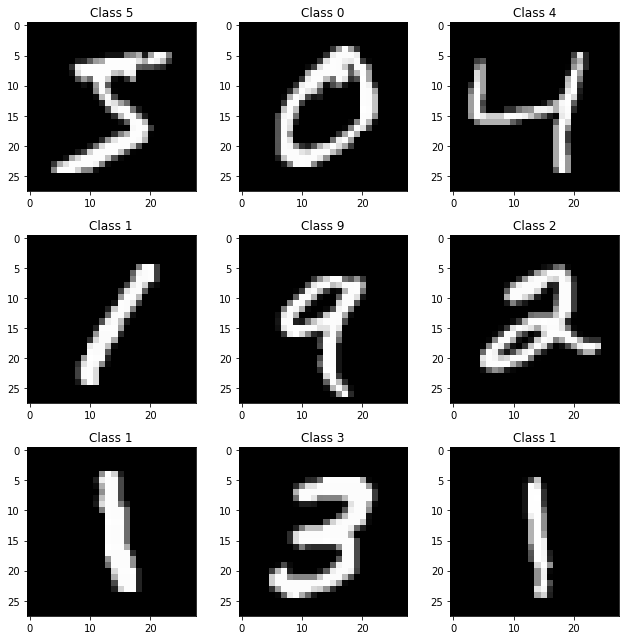

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

plt.tight_layout()

In [ ]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


In [ ]:
28*28

784

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
y_train[0]

5

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
from keras.utils import np_utils

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)

In [ ]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [ ]:
Y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu')) #Input Layer + Hidden 1
model.add(Dropout(0.2)) #Dropout
model.add(Dense(512, activation='relu')) #Hidden 2
model.add(Dropout(0.2)) #Dropout
model.add(Dense(512, activation='relu')) #Hidden 3
model.add(Dropout(0.2)) #Dropout
model.add(Dense(10, activation='softmax')) #Output Layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
375/375 [==============================] - 8s 21ms/step - loss: 0.2862 - accuracy: 0.9123 - val_loss: 0.1202 - val_accuracy: 0.9632
Epoch 2/5
375/375 [==============================] - 8s 20ms/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.0975 - val_accuracy: 0.9709
Epoch 3/5
375/375 [==============================] - 8s 20ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0924 - val_accuracy: 0.9728
Epoch 4/5
375/375 [==============================] - 8s 20ms/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.0842 - val_accuracy: 0.9753
Epoch 5/5
375/375 [==============================] - 8s 20ms/step - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.0814 - val_accuracy: 0.9772


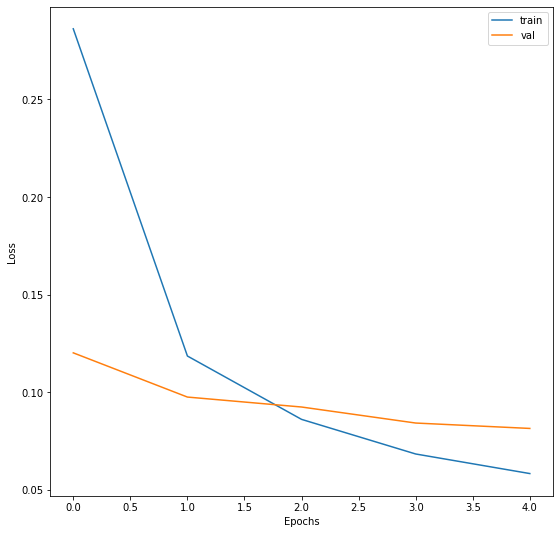

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

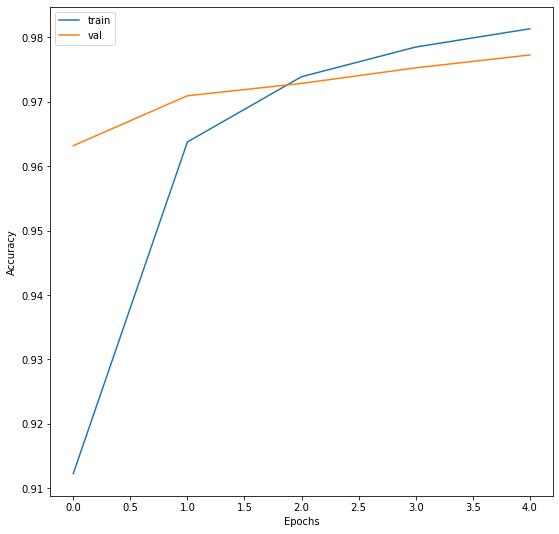

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted[0]

array([1.8922711e-11, 7.9990201e-08, 1.0643942e-06, 7.4212878e-08,
       2.5087665e-10, 1.6513253e-10, 2.7992472e-15, 9.9999642e-01,
       8.6575053e-11, 2.2458094e-06], dtype=float32)

In [ ]:
np.argmax(predicted[0])

7

In [ ]:
y_test[0]

7

In [ ]:
classes_x=np.argmax(predicted,axis=1)

In [ ]:
classes_x[:4]

array([7, 2, 1, 0])

In [ ]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

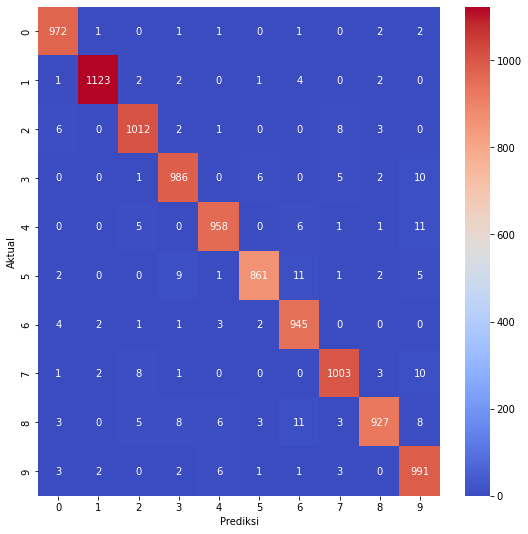

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,classes_x)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt="g")
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
correct_indices = np.nonzero(classes_x == y_test)[0]

incorrect_indices = np.nonzero(classes_x != y_test)[0]

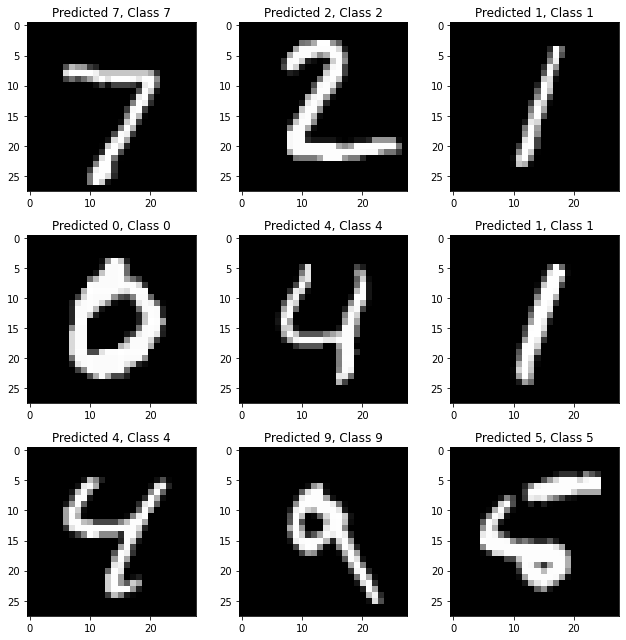

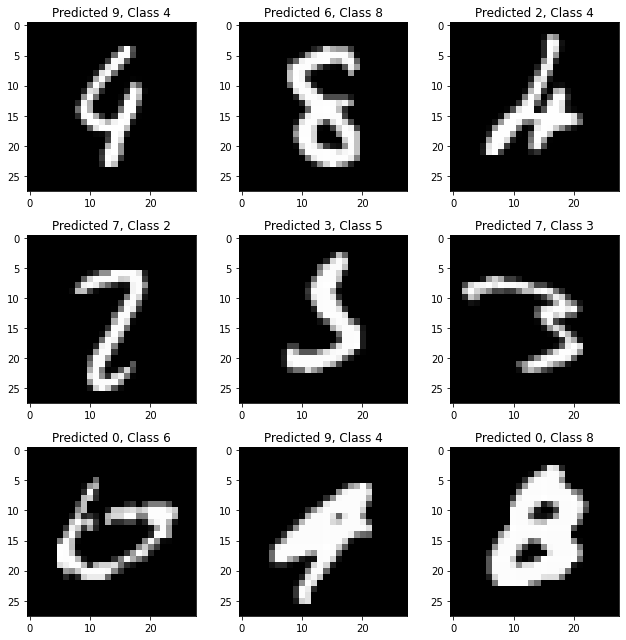

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_test[incorrect]))

plt.tight_layout()

#Convolutional Neural Networks

##Kuda vs Manusia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./horse-or-human.zip

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/drive/MyDrive/tes/horse-or-human.zip

--2022-03-20 09:44:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/drive/MyDrive/tes/horse-or-human.zip’

/content/drive/MyDr 100%[===================>] 142.65M  45.5MB/s    in 3.2s    

2022-03-20 09:44:03 (44.6 MB/s) - ‘/content/drive/MyDrive/tes/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
# file direktori dengan gambar kuda untuk training
train_horse_dir = os.path.join('./horse-or-human/horses')

# file direktori dengan gambar manusia untuk training
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

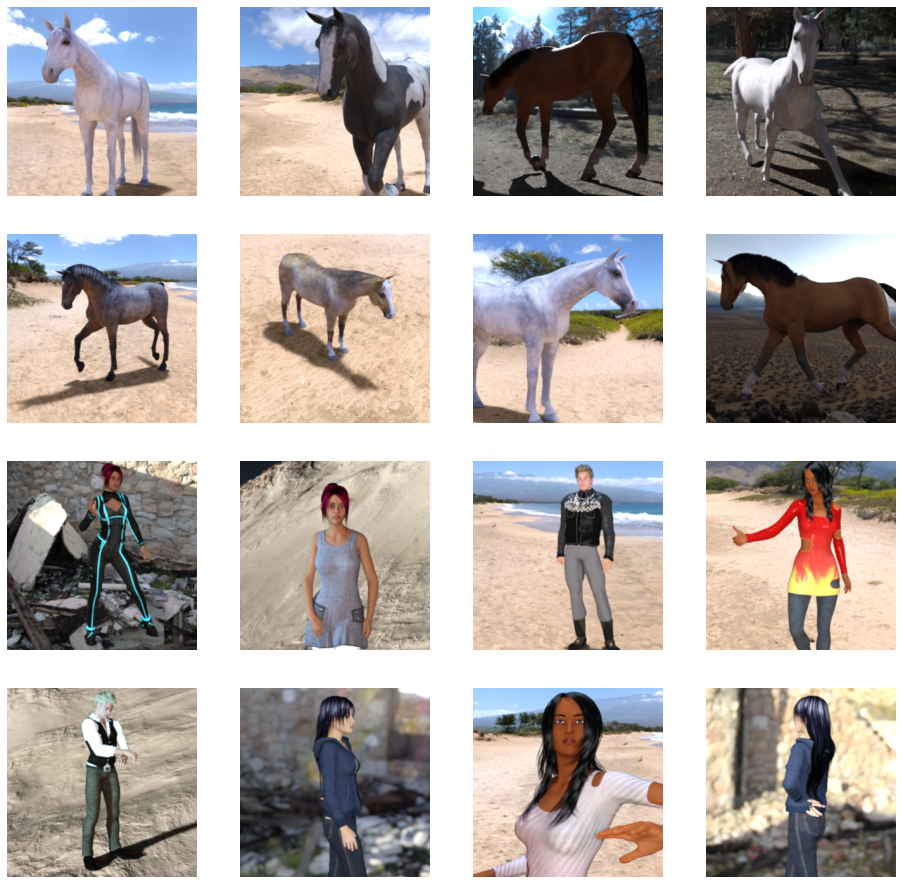

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Kita mau keluarin gambar dengan format 4x4
nrows = 4
ncols = 4

# index untuk iterasi
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# resize nilai matriks pada gambar
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # Sumber gambar
        target_size=(300, 300),  # resize gambar menjadi 300x300 piksel
        batch_size=128,
        subset='training',
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # Sumber gambar
        target_size=(300, 300),  # resize gambar menjadi 300x300 piksel
        batch_size=128,
        subset='validation',
        class_mode='binary')

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value 0 or 1 where 0 for ('horses') and 1 for ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      self.model.stop_training = True

stopTraining = Callback()

In [ ]:
history = model.fit(
      train_generator,
      validation_data=val_generator,
      callbacks=[stopTraining],
      epochs=100)

Epoch 1/100
7/7 [==============================] - 96s 13s/step - loss: 0.7103 - accuracy: 0.5292 - val_loss: 0.6676 - val_accuracy: 0.4878
Epoch 2/100
7/7 [==============================] - 88s 12s/step - loss: 0.5519 - accuracy: 0.7238 - val_loss: 0.4217 - val_accuracy: 0.7561
Epoch 3/100
7/7 [==============================] - 88s 12s/step - loss: 0.2302 - accuracy: 0.9002 - val_loss: 0.1951 - val_accuracy: 0.9024


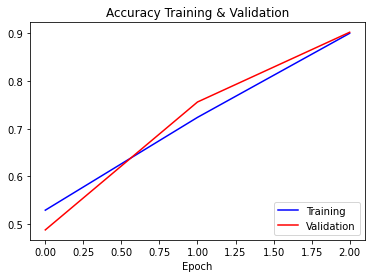

In [ ]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

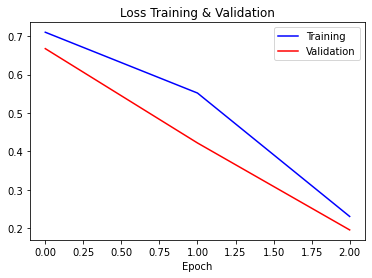

In [ ]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

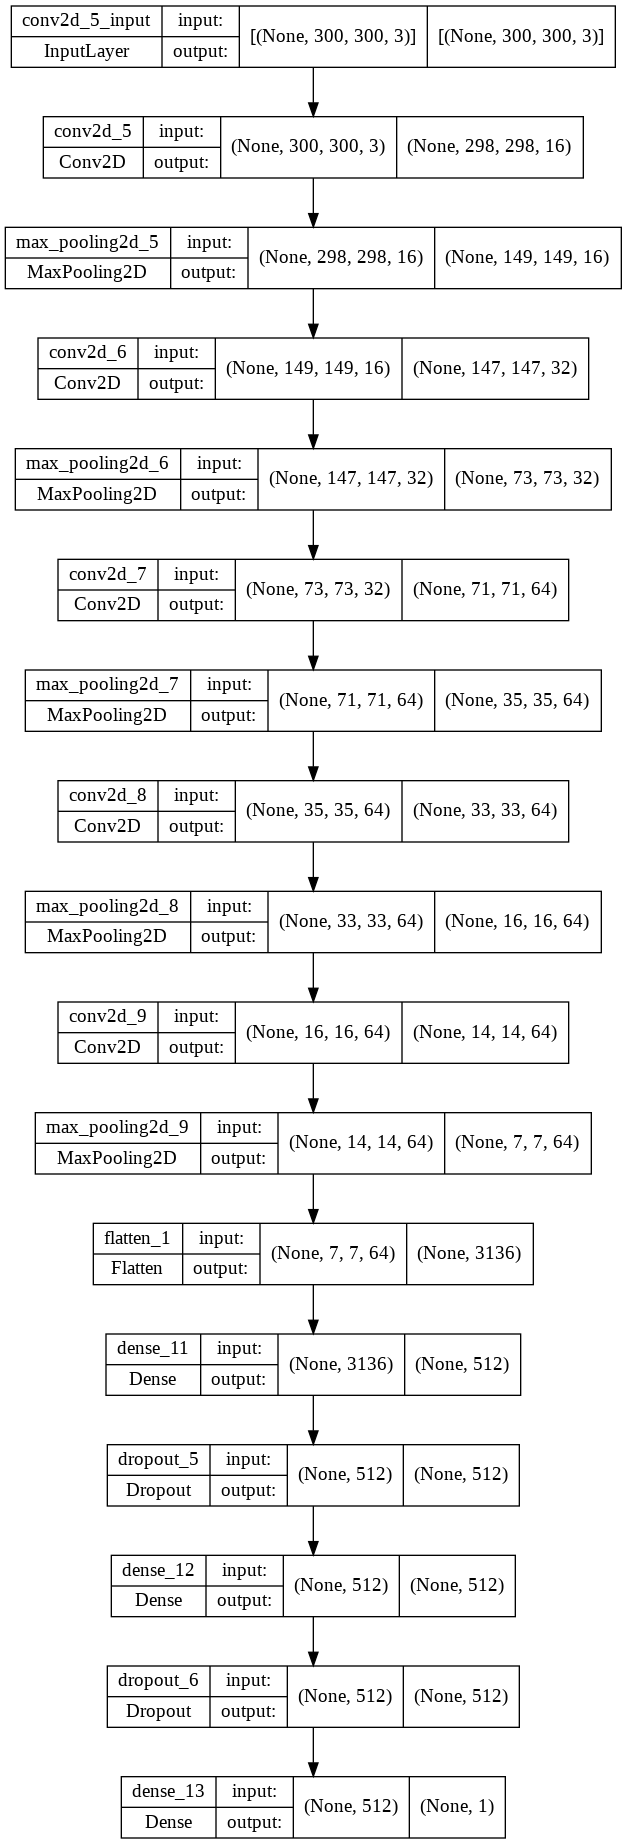

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png',show_shapes=True)

Saving Profil Biodata, Biografi dan Fakta Windah Basudara, New Brand Ambassador RRQ 2021!.jpg to Profil Biodata, Biografi dan Fakta Windah Basudara, New Brand Ambassador RRQ 2021!.jpg


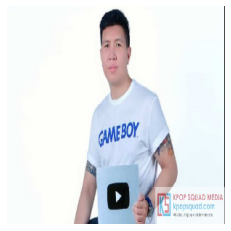

[1.]
Profil Biodata, Biografi dan Fakta Windah Basudara, New Brand Ambassador RRQ 2021!.jpg is a human


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

#Recurrent Neural Network

##Timeseries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download Data
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

In [ ]:
#Membaca Data
df = pd.read_csv(
  "london_bike_sharing.csv",
  parse_dates=['timestamp']
)
df.head(4)

1. "timestamp" - timestamp field for grouping the data
1. "cnt" - the count of a new bike shares
1. "t1" - real temperature in C
1. "t2" - temperature in C "feels like"
1. "hum" - humidity in percentage
1. "windspeed" - wind speed in km/h
1. "weathercode" - category of the weather
1. "isholiday" - boolean field - 1 holiday / 0 non holiday
1. "isweekend" - boolean field - 1 if the day is weekend
1. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

1. "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [ ]:
df.shape

In [ ]:
#Menyimpan Tanggal
dates = pd.to_datetime(df['timestamp'])
dates

In [ ]:
df = df.set_index('timestamp')
df.head(4)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

EDA

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 28)

hour = df.index.hour
sns.pointplot(x=hour, y=df['cnt'], ax=ax1)
sns.pointplot(x=hour, y=df['cnt'], hue=df['is_holiday'], ax=ax2)
sns.pointplot(x=hour, y=df['cnt'], hue=df['is_weekend'], ax=ax3)

Preprocessing

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

kolom = ['t1', 't2', 'hum', 'wind_speed']

x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

x_scale = x_scale.fit(train[kolom])
y_scale = y_scale.fit(train[['cnt']])

train.loc[:,kolom] = x_scale.transform(train[kolom])
train['cnt'] = y_scale.transform(train[['cnt']])

test.loc[:,kolom] = x_scale.transform(test[kolom])
test['cnt'] = y_scale.transform(test[['cnt']])

In [ ]:
train.head(4)

In [ ]:
train.shape

(samples, features) -> (samples, timestep, features)

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

X_train, y_train = create_dataset(train, train['cnt'], time_steps)
X_test, y_test = create_dataset(test, test['cnt'], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, activation='relu',
               input_shape=(X_train.shape[1],X_train.shape[2]),
               return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                     patience=2)

In [ ]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[callback],
                    shuffle=False)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

Prediksi

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[0:5]

In [ ]:
y_pred_inv = y_scale.inverse_transform(y_pred)
y_test_inv = y_scale.inverse_transform(y_test.reshape(1, -1))

In [ ]:
print(y_pred_inv[:5].flatten())
print(y_test_inv[:5])

In [ ]:
y_pred_inv = y_pred_inv.astype('int64')
y_test_inv = y_test_inv.astype('int64')

In [ ]:
print(y_pred_inv[:5].flatten())
print(y_test_inv[:5])

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dates[-X_test.shape[0]:], y_test_inv.flatten(), marker='.', label="Aktual")
plt.plot(dates[-X_test.shape[0]:], y_pred_inv.flatten(), label="Prediksi")
plt.ylabel('Total Rental Sepeda')
plt.xlabel('Tanggal')
plt.title('Prediksi Total Kebutuhan Sepeda di London')
plt.legend()
plt.show()

In [ ]:
df_forecast = pd.DataFrame({
    'Date' : dates[-X_test.shape[0]:],
    'Bike Count' : y_pred_inv.flatten()
    })

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

x = y_test_inv.flatten()
y = df_forecast['Bike Count'].values

mse = mean_squared_error(x,y)
rmse = mean_squared_error(x,y,squared=False) #RMSE
mae = mean_absolute_error(x,y)
mape = mean_absolute_percentage_error(x,y)
nilai_r = r2_score(x,y)

print('Nilai Mean Squared Error             = {:.2f}'.format(mse))
print('Nilai Root Mean Squared Error        = {:.2f}'.format(rmse))
print('Nilai Mean Absolute Error            = {:.2f}'.format(mae))
print('Nilai Mean Absolute Percentage Error = {:.2f}'.format(mape))
print('Nilai R2                             = {:.2f}'.format(nilai_r))

In [ ]:
df_forecast.to_csv('/content/Hasil Prediksi.csv')

##NLP

Word Based Encodings

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'saya suka baca buku', # -> saya, suka, baca, buku
    'dia membaca buku', # -> 5, 6, 1
    'buku itu sedang dibaca olehnya'
]

tokenizer = Tokenizer(num_words = 100) #lebih banyak lebih baik
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'buku': 1, 'saya': 2, 'suka': 3, 'baca': 4, 'dia': 5, 'membaca': 6, 'itu': 7, 'sedang': 8, 'dibaca': 9, 'olehnya': 10}


Padding

In [ ]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'saya suka baca buku',
    'dia membaca buku',
    'buku itu sedang dibaca olehnya'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") #OOV = Out of Vocab
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences) #merubah kalimat menjadi susunan kata yang menjadi angka

padded = pad_sequences(sequences, maxlen=5) #merubah susunan kalimat menjadi susunan angka
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'buku': 2, 'saya': 3, 'suka': 4, 'baca': 5, 'dia': 6, 'membaca': 7, 'itu': 8, 'sedang': 9, 'dibaca': 10, 'olehnya': 11}

Sequences =  [[3, 4, 5, 2], [6, 7, 2], [2, 8, 9, 10, 11]]

Padded Sequences:
[[ 0  3  4  5  2]
 [ 0  0  6  7  2]
 [ 2  8  9 10 11]]


In [ ]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'ayah membaca buku',
    'ayah suka kopi'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=3)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[1, 7, 2], [1, 4, 1]]

Padded Test Sequence: 
[[1 7 2]
 [1 4 1]]


IMDB Review Dataset

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52IVH4/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52IVH4/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52IVH4/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test'] #mengambil data train dan data testing

training_sentences = [] #menyimpan kalimat
training_labels = [] #menyimpan label (0 dan 1) = negatif dan positif

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
print(len(train_data),len(test_data))

25000 25000


In [ ]:
training_sentences[0:5]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [ ]:
training_labels_final[0:5]

array([0, 0, 0, 1, 1])

In [ ]:
num_zeros = (training_labels_final == 0).sum()
num_ones = (training_labels_final == 1).sum()

In [ ]:
print(num_zeros, num_ones)

12500 12500


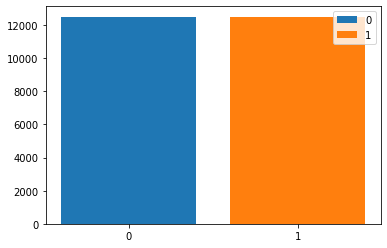

In [ ]:
import matplotlib.pyplot as plt

plt.bar([0],num_zeros, label='0')
plt.bar([1],num_ones, label='1')
plt.xticks([0,1])
plt.legend()
plt.show()

jika data imbalance, kita bisa memakai library atau beberapa hal untuk menangani hal tsb. contohnya SMOTE

In [ ]:
vocab_size = 100000 #kosakata yang disimpan
embedding_dim = 16
max_length = 120 #maksimal panjang kalimat 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #membuat tokenizer
tokenizer.fit_on_texts(training_sentences) #mengambil kosakata di kalimat data training
word_index = tokenizer.word_index #mengambil index nya
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
print("\nWord Index = " , word_index)


Word Index =  {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'hi

In [ ]:
padded[0]

array([    0,     0,     0,    12,    14,    33,   425,   392,    18,
          90,    28, 10554,     9,    32,  1366,  3585,    40,   486,
       11038,   197,    24,    85,   154,    19,    12,   213,   329,
          28,    66,   247,   215,     9,   477,    58,    66,    85,
         114,    98,    22,  5675,    12,  1322,   643,   767,    12,
          18,     7,    33,   400,  8170,   176,  2455,   416,     2,
          89,  1231,   137,    69,   146,    52,     2, 30569,  7577,
          69,   229,    66,  2933,    16, 19500,  2904, 20599, 18511,
        1479,  4940,     3,    39,  3900,   117,  1584,    17,  3585,
          14,   162,    19,     4,  1231,   917,  7917,     9,     4,
          18,    13,    14,  4139,     5,    99,   145,  1214,    11,
         242,   683,    13,    48,    24,   100,    38,    12,  7181,
        5515,    38,  1366, 13887,    50,   401,    11,    98,  1197,
         867,   141,    10], dtype=int32)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm chair and mellow for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no rapids to cross no dangerous waters just a warm and witty paddle through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(), #jadi 1 dimensi = [1,2,5,8,0]
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           1600000   
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                61472     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy') > 0.80):
      self.model.stop_training = True

stopTraining = Callback()

In [ ]:
num_epochs = 100
history = model.fit(padded, training_labels_final,
                    validation_split=0.2,
                    epochs=num_epochs,
                    callbacks=[stopTraining]
                    )

Epoch 1/100
625/625 [==============================] - 10s 15ms/step - loss: 0.5280 - accuracy: 0.7075 - val_loss: 0.3762 - val_accuracy: 0.8328
Epoch 2/100
 31/625 [>.............................] - ETA: 8s - loss: 0.2341 - accuracy: 0.9173

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Prediksi

In [ ]:
predicted = np.array(model.predict(testing_padded))

In [ ]:
predicted

In [ ]:
predicted = np.where(predicted >= 0.6, 1, predicted)
predicted = np.where(predicted < 0.6, 0, predicted)

In [ ]:
predicted.flatten()[:5]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels_final,predicted))

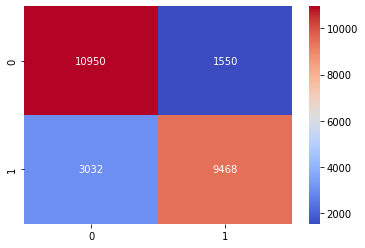

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testing_labels_final,predicted)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='d')

In [ ]:
hasil = pd.DataFrame()

hasil['Sentences'] = testing_sentences
hasil['Aktual'] = testing_labels_final
hasil['Prediksi'] = predicted.astype('int64')

hasil.head(4)

,Sentences,Aktual,Prediksi
0,There are films that make careers. For George ...,1,0
1,"A blackly comic tale of a down-trodden priest,...",1,1
2,"Scary Movie 1-4, Epic Movie, Date Movie, Meet ...",0,0
3,Poor Shirley MacLaine tries hard to lend some ...,0,0


In [ ]:
hasil['Sentences'].values[0]

"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."

In [ ]:
hasil['Sentences'].values[1]

"A blackly comic tale of a down-trodden priest, Nazarin showcases the economy that Luis Bunuel was able to achieve in being able to tell a deeply humanist fable with a minimum of fuss. As an output from his Mexican era of film making, it was an invaluable talent to possess, with little money and extremely tight schedules. Nazarin, however, surpasses many of Bunuel's previous Mexican films in terms of the acting (Francisco Rabal is excellent), narrative and theme.<br /><br />The theme, interestingly, is something that was explored again in Viridiana, made three years later in Spain. It concerns the individual's struggle for humanity and altruism amongst a society that rejects any notion of virtue. Father Nazarin, however, is portrayed more sympathetically than Sister Viridiana. Whereas the latter seems to choose charity because she wishes to atone for her (perceived) sins, Nazarin's whole existence and reason for being seems to be to help others, whether they (or we) like it or not. The

In [ ]:
hasil['Sentences'].values[2]

'Scary Movie 1-4, Epic Movie, Date Movie, Meet the Spartans, Not another Teen Movie and Another Gay Movie. Making "Superhero Movie" the eleventh in a series that single handily ruined the parody genre. Now I\'ll admit it I have a soft spot for classics such as Airplane and The Naked Gun but you know you\'ve milked a franchise so bad when you can see the gags a mile off. In fact the only thing that might really temp you into going to see this disaster is the incredibly funny but massive sell-out Leslie Neilson.<br /><br />You can tell he needs the money, wither that or he intends to go down with the ship like a good Capitan would. In no way is he bringing down this genre but hell he\'s not helping it. But if I feel sorry for anybody in this film its decent actor Drake Bell who is put through an immense amount of embarrassment. The people who are put through the largest amount of torture by far however is the audience forced to sit through 90 minutes of laughless bile no funnier than her

In [ ]:
hasil.to_csv('Hasil Prediksi NLP.csv',index=False)